In [44]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pydot
import os
import ipywidgets as widgets
from ipyfilechooser import FileChooser
from networkx.drawing.nx_pydot import graphviz_layout
from networkx.drawing.nx_agraph import to_agraph 
from copy import deepcopy
import pickle
from collections import Counter

from plot_module import plot_neuron_graph_realxy, plot_neuron_graph_subset
from neuron_graph_helper import edge_length, edge_volume, volume_by_type, nxgraph_from_swc_df, remove_transition_nodes

In [2]:
nodetype_dict = {1:'soma', 2:'axon', 3:'dendrite', 4:'dendrite'}
color_dict = {1:'red', 2:'blue', 3:'limegreen', 4:'limegreen'}

In [104]:

def load_swc_into_df(file_path):
    full_swc_df = pd.read_csv(
        file_path, 
        sep = ' ', 
        header=None, 
        skipinitialspace = True, 
        comment='#', 
        skip_blank_lines=True
        )
    # add column names
    full_swc_df.columns = ['comp_id','type','x','y','z','radius','parent_id']

    # drop the extra soma nodes (.swc files have 3 identically sized soma nodes for some reason)
    index_to_drop = full_swc_df[(full_swc_df['type'] == 1) & (full_swc_df['parent_id'] == 1)].index
    full_swc_df.drop(index_to_drop, inplace=True)
        
    # replace ids of 4 with 3
    full_swc_df['type'].replace({4:3}, inplace=True)
    
    return full_swc_df

### DELETE FILES WITH MORE THAN 1 AXON NODE NOT AT THE MAIN AXON
# folder = 'neuron_shape_data'

# # Loop through all directories, subdirectories, and files
# for dirpath, dirnames, filenames in os.walk(folder):
#     # Loop through each file in the current directory/subdirectory
#     for filename in filenames:
#         file_path = os.path.join(dirpath, filename)
#         file_name = os.path.basename(file_path)
#         name, extension = os.path.splitext(file_name)
#         if extension == '.swc':
#             #print(file_path)
#             dataframe = load_swc_into_df(file_path)
#             n_axon_nodes = Counter(dataframe['type'].to_list())[1]
#             #print(n_axon_nodes)
        
#             # Check your condition here
#             if n_axon_nodes != 1:  # replace this with your actual condition
#                 # Delete the file
#                 print(f'deleting {file_path}')
#                 #os.remove(file_path)

In [78]:
# Specify the directory
directory = 'neuron_shape_data'

fc = FileChooser(directory)
display(fc)

FileChooser(path='/home/daniel/Projects/2023_Jones_Lab_mtDNA/SSD/SSD_Neuron/neuron_shape_data', filename='', t…

In [105]:
file_path = fc.selected
assert file_path != None, 'No file selected!'
assert os.path.isfile(file_path), f'"{file_path}" does not point to a file!'

file_name = os.path.basename(file_path)
name, extension = os.path.splitext(file_name)
print(f'Opened "{file_name}", inferred the name is "{name}"')

full_swc_df = load_swc_into_df(file_path)
print(full_swc_df)

Opened "Yin20161231s3_AR.CNG.swc", inferred the name is "Yin20161231s3_AR.CNG"
       comp_id  type       x       y      z  radius  parent_id
0            1     1    0.00    0.00   0.00   6.770         -1
3            4     2   -4.94   -7.70   1.32   0.930          1
4            5     2   -5.57   -9.07   1.29   0.895          4
5            6     2   -6.35  -11.19   1.57   0.780          5
6            7     2   -7.02  -13.72   2.79   0.670          6
...        ...   ...     ...     ...    ...     ...        ...
11057    11058     3  106.10 -151.86  40.54   0.425      11057
11058    11059     3  105.97 -152.88  40.45   0.390      11058
11059    11060     3  105.34 -153.86  40.27   0.215      11059
11060    11061     3  104.97 -154.41  40.34   0.240      11060
11061    11062     3  104.84 -155.03  40.49   0.190      11061

[11060 rows x 7 columns]


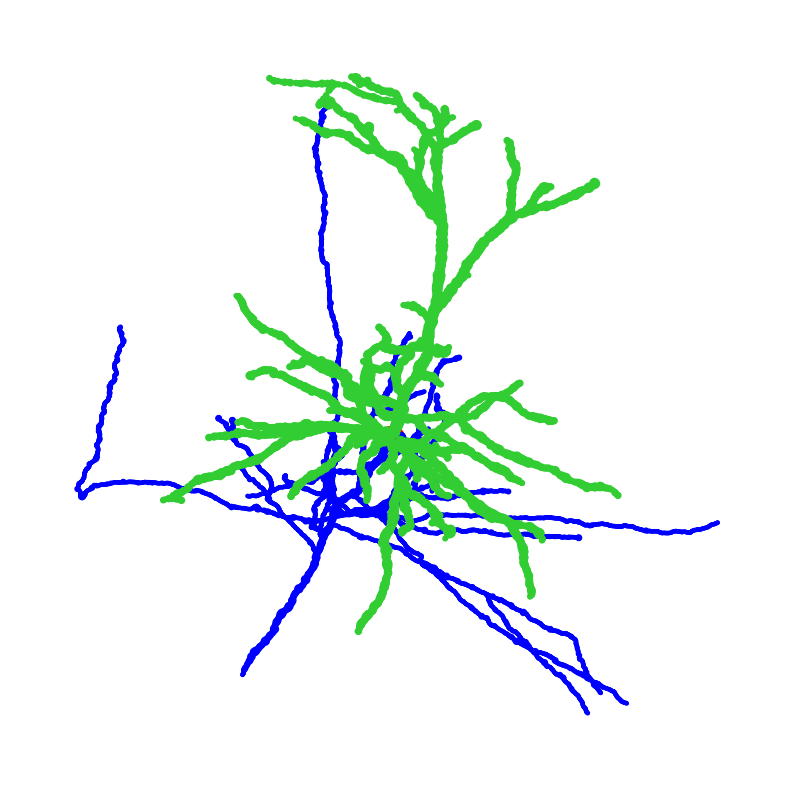

absolute volumes (s, a, d) [1299.73  438.85 6268.81]
relative volumes (s, a, d) [0.16 0.05 0.78]


array([1299.73,  438.85, 6268.81])

In [106]:
neuron_graph_full = nxgraph_from_swc_df(full_swc_df)
plot_neuron_graph_realxy(neuron_graph_full)
volume_by_type(neuron_graph_full, prnt = True)

       comp_id  type       x       y      z  radius  parent_id
0            1     1    0.00    0.00   0.00   6.770         -1
33          34     2  -29.31  -53.92  13.39   0.965          1
35          36     2  -28.23  -55.46  11.32   0.270         34
101        102     2   -8.39  -77.18  14.56   0.235         36
270        271     2   30.20  -51.66  50.27   0.105        102
...        ...   ...     ...     ...    ...     ...        ...
10775    10776     3   32.65   -5.82 -11.22   0.250      10767
10794    10795     3   41.90  -19.42 -12.10   0.270      10767
10803    10804     3   23.60  -12.17   8.28   0.210      10747
10907    10908     3   99.27  -43.56  41.83   0.105      10804
11061    11062     3  104.84 -155.03  40.49   0.190      10804

[210 rows x 7 columns]
absolute volumes (s, a, d) [1299.73  641.23 4190.07]
relative volumes (s, a, d) [0.21 0.1  0.68]


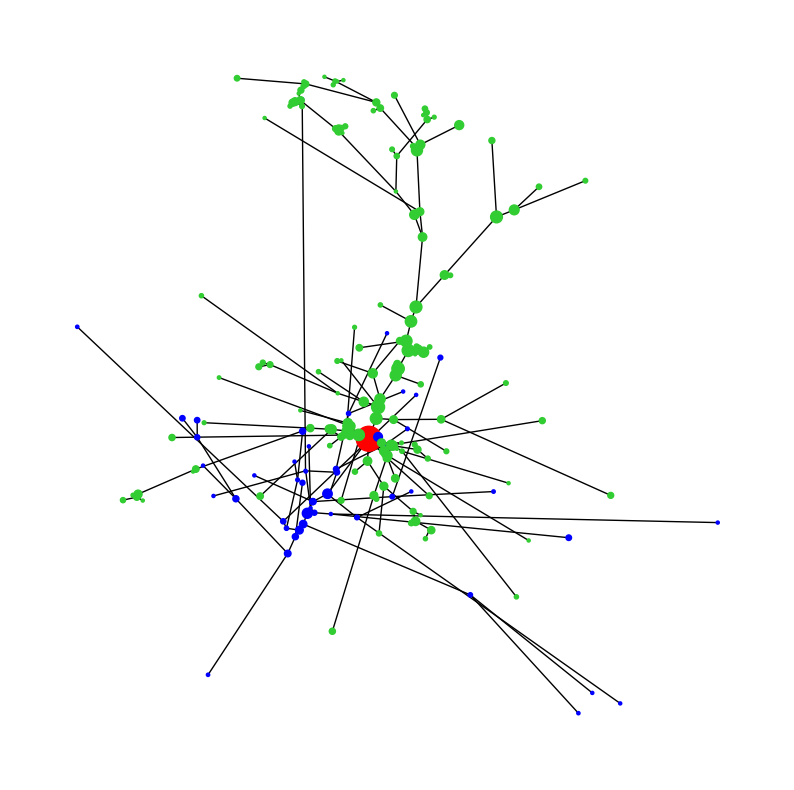

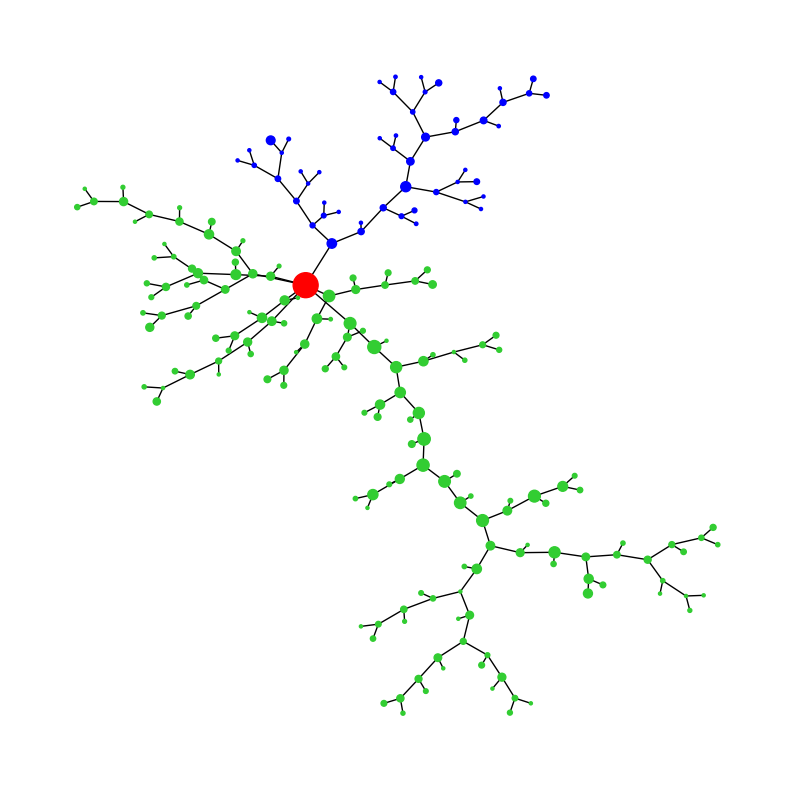

In [107]:
filtered_swc_df = remove_transition_nodes(neuron_graph_full, full_swc_df)
print(filtered_swc_df)
neuron_graph_filtered = nxgraph_from_swc_df(filtered_swc_df)
volume_by_type(neuron_graph_filtered, prnt = True)
plot_neuron_graph_realxy(neuron_graph_filtered)
plot_neuron_graph_subset(neuron_graph_filtered)

In [ ]:
# G = neuron_graph_filtered
# central_node = '1'

# def get_edges_in_each_branch(graph, root):
#     # List to store branches
#     branches = []
#     # Depth-first search starting from the root
#     for edge in nx.dfs_edges(graph, source=root):
#         if not branches or edge[0] == root:
#             # Start a new branch
#             branches.append([edge])
#         else:
#             # Continue the current branch
#             branches[-1].append(edge)
#     return branches

# def get_nodes_in_each_branch(graph, root):
#     edges_in_each_branch = get_edges_in_each_branch(graph, root)
#     nodes_in_each_branch = []
#     for branch in edges_in_each_branch:
#         nodes_in_each_branch.append(sorted(list(set([item for sublist in branch for item in sublist])), key = int))
    
#     return nodes_in_each_branch

# print(get_nodes_in_each_branch(G, central_node))

# edges_in_each_branch = get_edges_in_each_branch(G, central_node)
# for branch in edges_in_each_branch:
#     print(round(np.sum([data['volume'] for u, v, data in G.edges(data = True) if (u,v) in branch]), 2))

In [ ]:
# distance_to_soma = [nx.dijkstra_path_length(G, source='1', target=node, weight='len') for node in G.nodes if node != '1']
# diameter_at_node = [data['radius'] for node, data in G.nodes(data = True) if node != '1']
# node_type = [data['nodetype'] for node, data in G.nodes(data = True) if node != '1']
# plt.scatter(distance_to_soma, diameter_at_node, c = node_type)
# plt.ylim(0,None)

In [108]:
print(f"Wrote {name} to a .pkl file")
with open(f'neuron_shape_data/{name}.pkl', 'wb') as f:
    pickle.dump(neuron_graph_filtered, f)

Wrote Yin20161231s3_AR.CNG to a .pkl file
